# Hello  everyone its day 23 Today we have the vizualization i made analysis of Global terrorism Database 

In [77]:
##import libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from wordcloud import wordcloud,STOPWORDS,WordCloud

In [3]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin-1')

data.head()

C:\Users\kabir\AppData\Local\Temp\ipykernel_2612\679109500.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [12]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [14]:
##select only nessessery columns 
data = data[['iyear','imonth','iday','country_txt','region_txt','provstate','location','extended','success','suicide','attacktype1_txt','targtype1_txt',
             'targsubtype1_txt','target1','nkill','nwound','weaptype1_txt','motive','summary','gname','city','latitude','longitude']]

In [16]:
##rename these columns 
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'state',
                     'attacktype1_txt':'attack_type','targtype1_txt':'target_type','targsubtype1_txt':'target_subtype','target1':'target',
                     'nkill':'killed','nwound':'wounded','weaptype1_txt':'weapon_type','gname':'group'}, inplace = True)

C:\Users\kabir\AppData\Local\Temp\ipykernel_2612\3007847221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'state',


<AxesSubplot: >

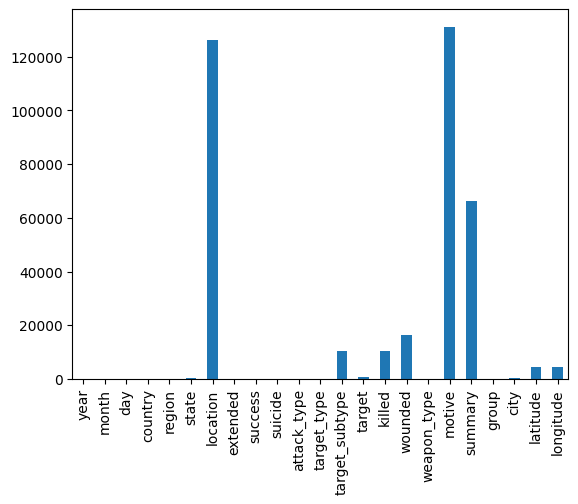

In [21]:
data.isnull().sum().plot.bar()

As we seen from above  observation that their is 35% of missing value where location motive has 70 % ofmissing value 

In [23]:
data.to_excel('global_terroris.xlsx',index=False)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            181691 non-null  int64  
 1   month           181691 non-null  int64  
 2   day             181691 non-null  int64  
 3   country         181691 non-null  object 
 4   region          181691 non-null  object 
 5   state           181270 non-null  object 
 6   location        55495 non-null   object 
 7   extended        181691 non-null  int64  
 8   success         181691 non-null  int64  
 9   suicide         181691 non-null  int64  
 10  attack_type     181691 non-null  object 
 11  target_type     181691 non-null  object 
 12  target_subtype  171318 non-null  object 
 13  target          181055 non-null  object 
 14  killed          171378 non-null  float64
 15  wounded         165380 non-null  float64
 16  weapon_type     181691 non-null  object 
 17  motive    

# Cheaking correlations

C:\Users\kabir\AppData\Local\Temp\ipykernel_2612\291057077.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



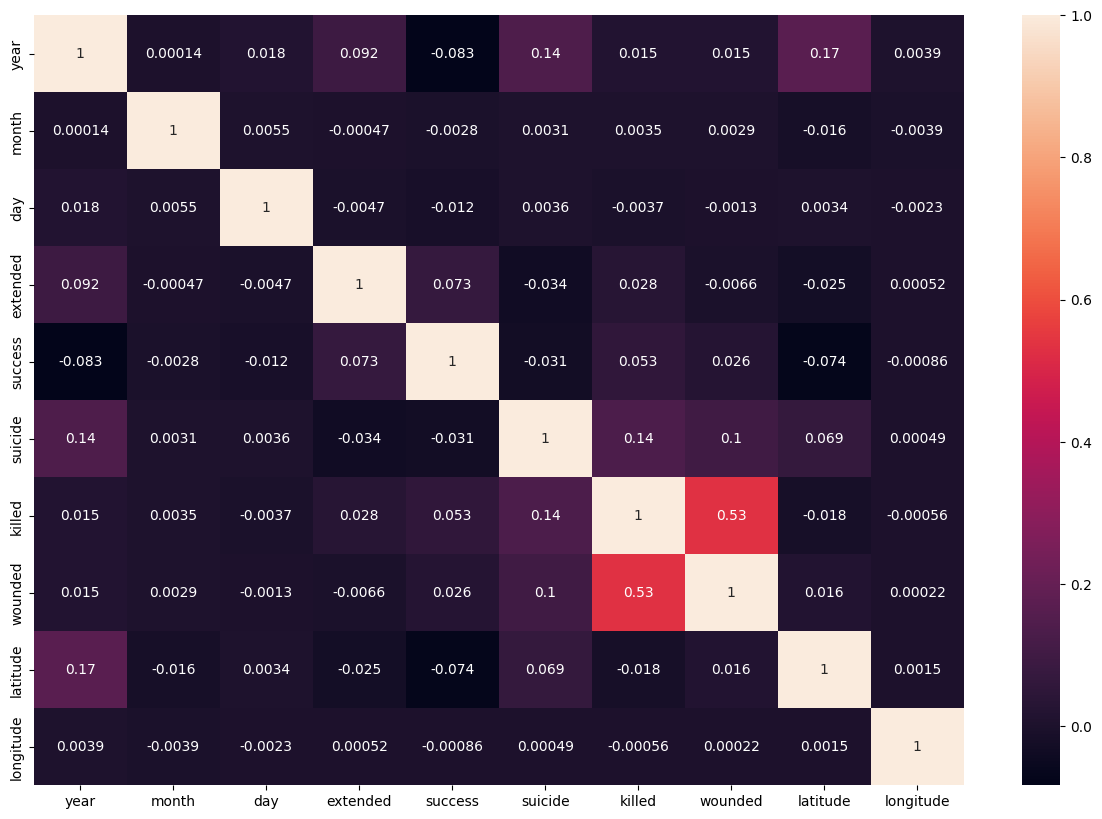

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

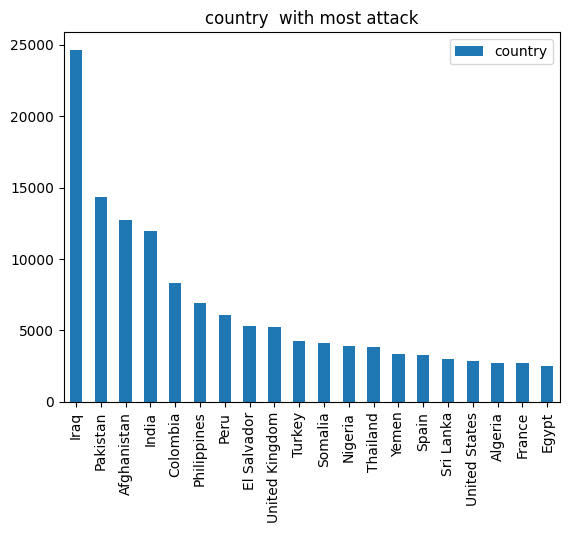

In [70]:
plt.plot(15,6)
data['country'].value_counts().head(20).plot.bar()
plt.legend()
plt.title('country  with most attack')
plt.show()

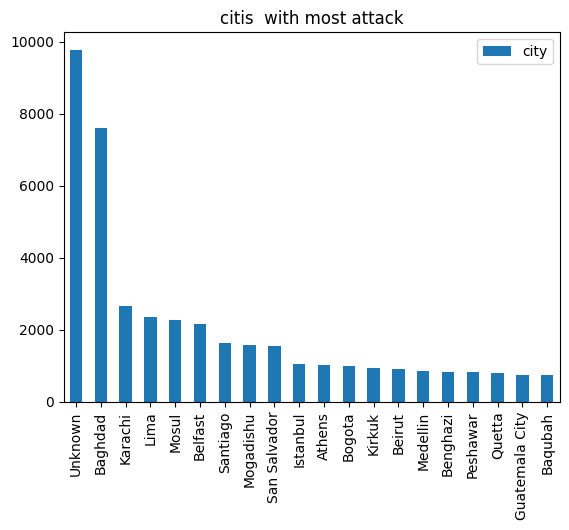

In [49]:
plt.plot(15,6)
data['city'].value_counts().head(20).plot.bar()
plt.legend()
plt.title('citis  with most attack')
plt.show()

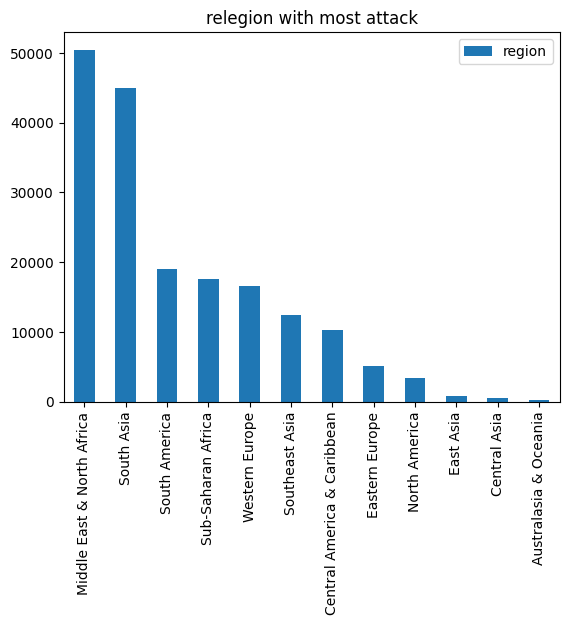

In [50]:
plt.plot(15,6)
data['region'].value_counts().head(20).plot.bar()
plt.legend()
plt.title('relegion with most attack')
plt.show()

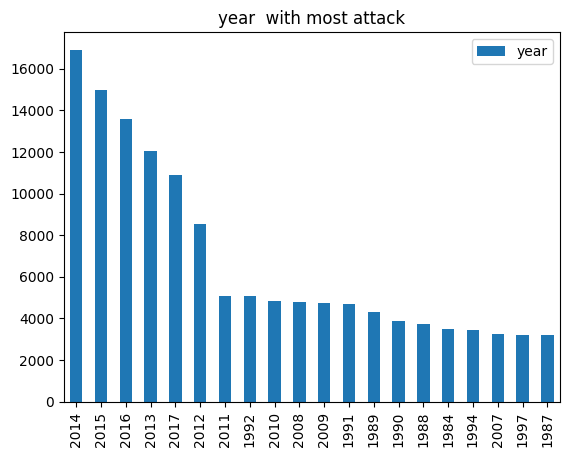

In [51]:
plt.plot(15,6)
data['year'].value_counts().head(20).plot.bar()
plt.legend()
plt.title('year  with most attack')
plt.show()

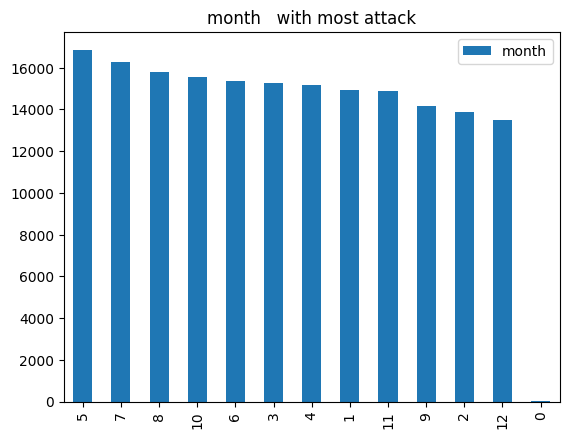

In [52]:
plt.plot(15,6)
data['month'].value_counts().head(20).plot.bar()
plt.legend()
plt.title('month   with most attack')
plt.show()

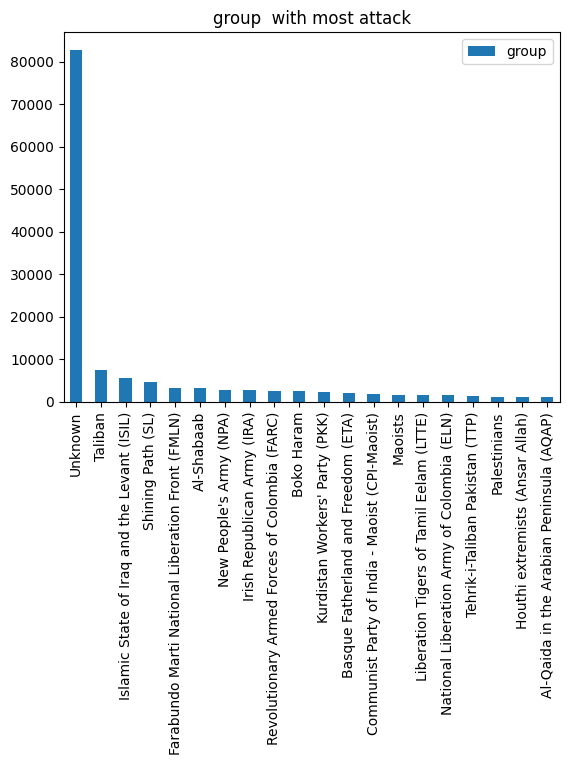

In [53]:
plt.plot(15,6)
data['group'].value_counts().head(20).plot.bar()
plt.legend()
plt.title('group  with most attack')
plt.show()

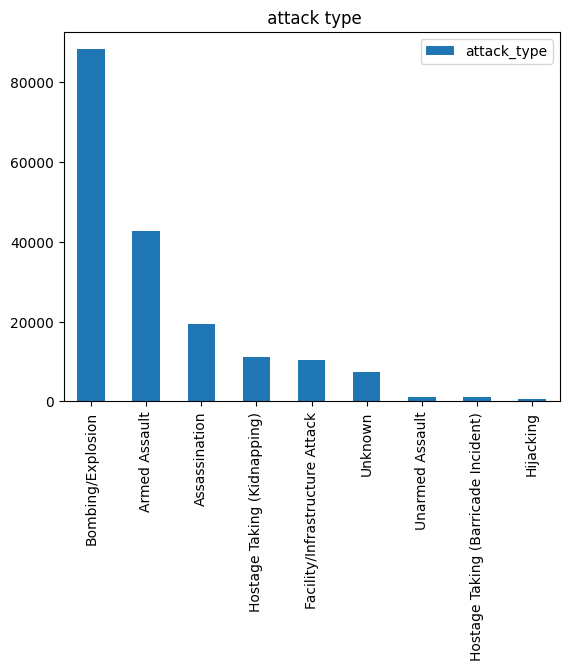

In [54]:
plt.plot(15,6)
data['attack_type'].value_counts().head(20).plot.bar()
plt.legend()
plt.title(' attack type')
plt.show()

# Now we cheak attack per yearly 

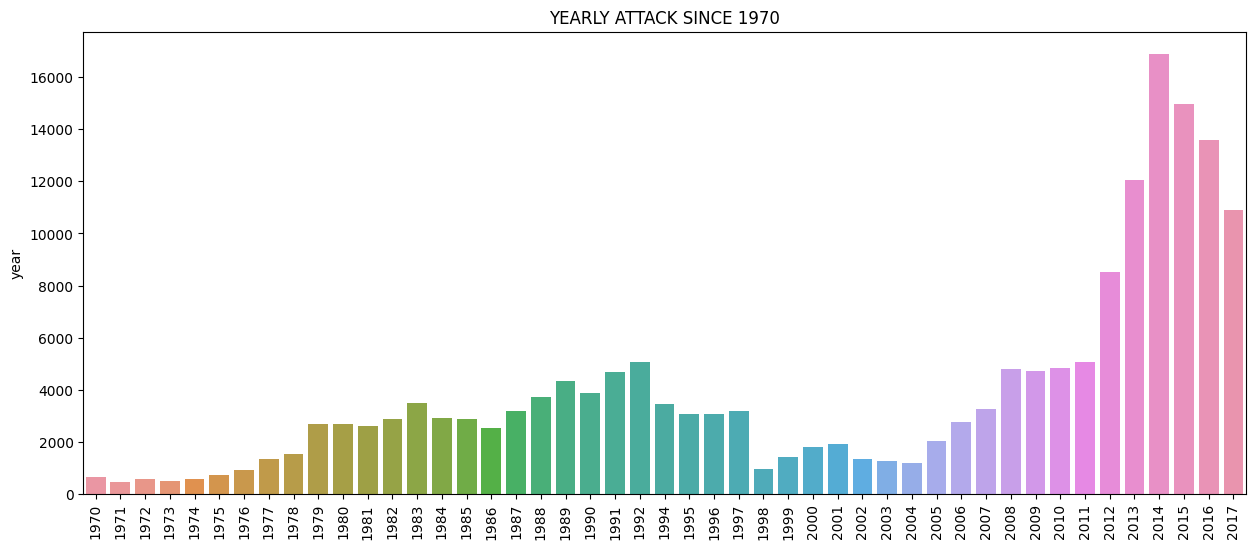

In [64]:
year_count=data.year.value_counts(dropna=True).sort_index()
yearss=data.year.unique()
plt.figure(figsize=(15,6))
sns.barplot(x=yearss,y=year_count)
plt.xticks(rotation=90)
plt.title('YEARLY ATTACK SINCE 1970')
plt.show()

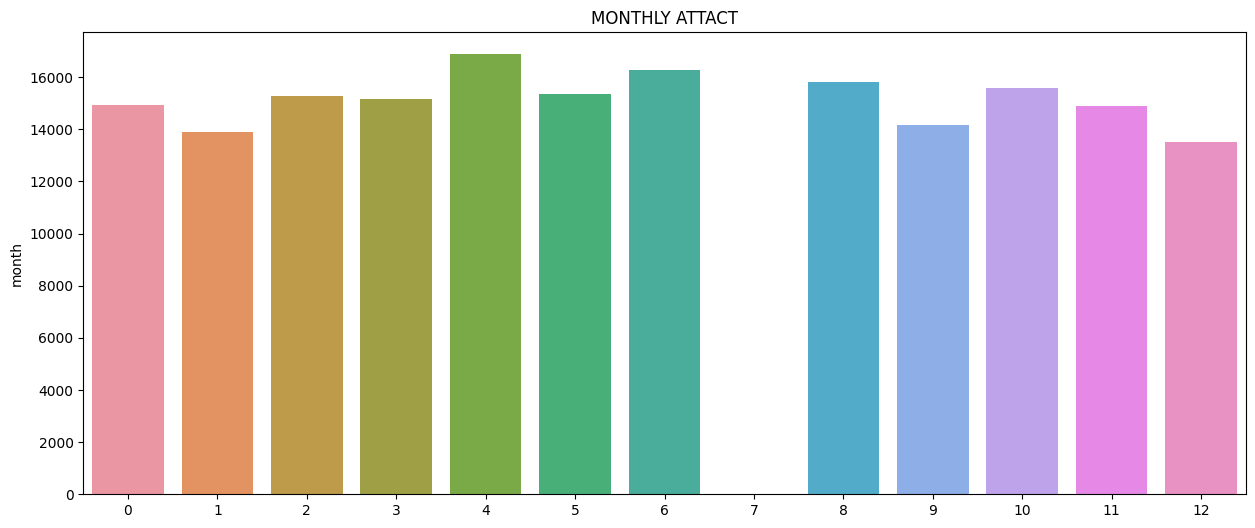

In [65]:
monthly_count=data.month.value_counts(dropna=True).sort_index()
monthly=data.month.unique()
plt.figure(figsize=(15,6))
sns.barplot(x=monthly,y=monthly_count)
plt.title('MONTHLY ATTACT')
plt.show()


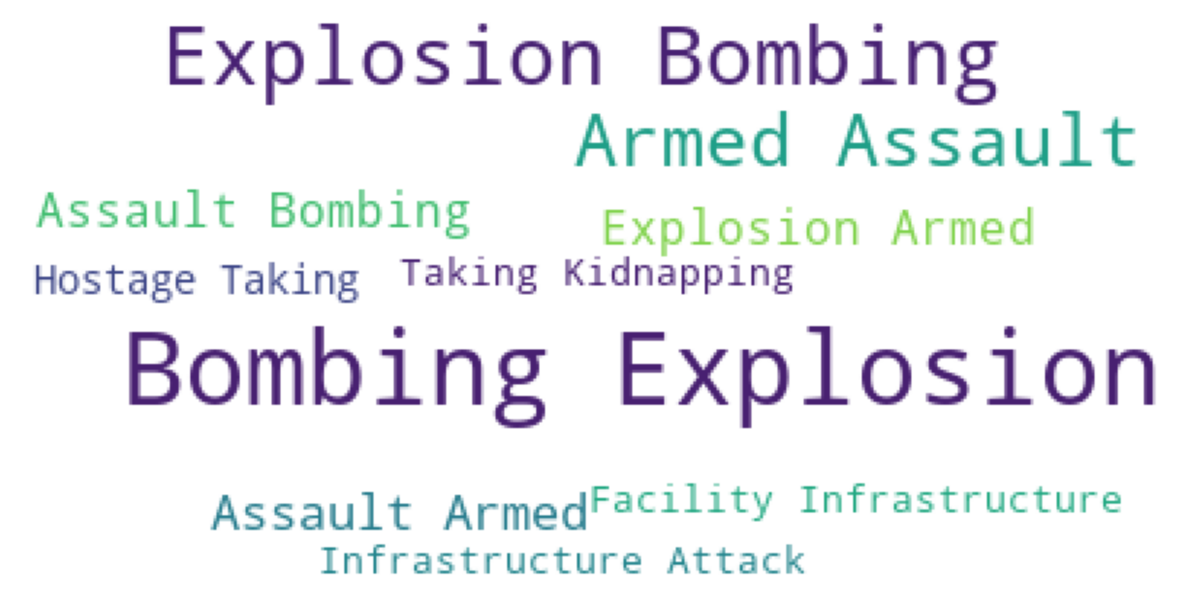

In [87]:
#Cheaking gross total yearly
stop_word=set(STOPWORDS)
text=" ".join(data['attack_type'])
word_cloud=WordCloud(background_color='white',stopwords=stop_word,random_state=42,max_words=10).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()
